Pseudocode of Dynamic Time Warping


```
int DTWDistance(s: array [1..n], t: array [1..m]) {
    DTW := array [0..n, 0..m]
    
    for i := 0 to n
        for j := 0 to m
            DTW[i, j] := infinity
    DTW[0, 0] := 0
    
    for i := 1 to n
        for j := 1 to m
            cost := d(s[i], t[j])
            DTW[i, j] := cost + minimum(DTW[i-1, j  ],    // insertion
                                        DTW[i  , j-1],    // deletion
                                        DTW[i-1, j-1])    // match
    
    return DTW[n, m]
}
```

# Installation and Import Lirary Used for Implementation


In [1]:
!pip install dtw -q

In [2]:
from fastdtw import fastdtw
from dtw import dtw
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.spatial.distance import euclidean
import IPython.display as ipd
import librosa
import librosa.display
from tqdm.notebook import tqdm
import os
import warnings
warnings.filterwarnings('ignore')

# Implementation behind DTW algorithm
 

In [3]:
def get_DTW_matrix(s, t, verbose=False):
  n, m = len(s), len(t)

  # n + 1 and m + 1 because need too add a warp path along the border
  dtw_mat = np.zeros((n + 1, m + 1))

  # Populate the distance matrix with infinity
  for i in range(n + 1): # O(nm)
    for j in range(m + 1):
      dtw_mat[i, j] = np.inf
  if verbose:
    print('Initialized DTW Matrix with {} rows, {} columns\n'.format(n, m))
    print(dtw_mat)

  # Initialize the first position as 0
  dtw_mat[0, 0] = 0
  
  # Calculate the distance for each point
  # The row and column with inf can be ignored
  for i in range(1, n + 1):
    for j in range(1, m + 1):
      dtw_mat[i, j] = abs(s[i - 1] - t[j - 1]) + min(dtw_mat[i, j-1],
                                             dtw_mat[i-1, j],
                                             dtw_mat[i-1, j-1])
  if verbose:
    print('\nCalculated Distance Matrix\n')
    print(dtw_mat)
    print()
    print('Removed rows and columns with inf\n')
  
  dtw_mat = dtw_mat[1:, 1:]
  if verbose:
    print(dtw_mat)
  return dtw_mat

In [4]:
# Using backtracking to find the total warping distance
def get_warping_path(dtw_mat, verbose=False):
  n, m = dtw_mat.shape
  # Getting warping path
  warping_path = []
  i = n - 1
  j = m - 1
  # Append the first warping path index
  warping_path.append((i, j))

  # Terminate condition is when the index reaches 0 as it reaches top of matrix
  while i != 0 and j != 0:
      # Finding minimum value closest to the current value
      # Like a square, the current value is on the bottom right,
      # We take account of the other 3 values, top right, top left, bottom left
      # Then find the minimum values among this 3 value
      min_val = min(dtw_mat[i-1, j-1],
                   dtw_mat[i, j-1],
                   dtw_mat[i-1, j], key=lambda x : float(x))
      
      # Finding the index of the minimum values for backtracking
      if min_val == dtw_mat[i-1, j-1]:
        min_idx = (i-1, j-1)
      elif min_val == dtw_mat[i, j-1]:
        min_idx = (i, j-1)
      else:
        min_idx = (i-1, j)
      if verbose:
        print('Current Minimum Value:',min_val)
      
      # Add the index of the min value to the warping path lists as record
      warping_path.append(min_idx)
      # Set the index of minimum value to the current index for next
      # backtracking
      i, j = min_idx

  # The current warping path is displayed reversed, as we backtrack
  # from the last index
  if verbose:
    print('Warping Path:', warping_path)
  return warping_path


a = [1, 3, 4, 9, 8, 2, 1, 7, 7, 3]
b = [1, 6, 2, 3, 0, 9, 4, 3, 6, 3]
dtw_mat =  get_DTW_matrix(a, b)
warping_path = get_warping_path(dtw_mat)

# Last value in the matrix is the calculated distance
print('Calculated distance:', dtw_mat[-1, -1])
# Reversing back the warping path
print('Calculated Warping path:', warping_path[::-1])

## Verification with fastdtw API
distance, wp = fastdtw(a, b)
print('Distance for verification:', distance)
print('Warping path for verification:', wp)

Calculated distance: 15.0
Calculated Warping path: [(0, 0), (1, 1), (1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (5, 6), (6, 7), (7, 8), (8, 8), (9, 9)]
Distance for verification: 15.0
Warping path for verification: [(0, 0), (1, 1), (1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (5, 6), (6, 7), (7, 8), (8, 8), (9, 9)]


# Implementation on Audio File

In [5]:
import copy
def pre_mfcc(mfcc):
  mfcc_cp = copy.deepcopy(mfcc)
  for i in range(mfcc_cp.shape[1]):
    # Zeroing the mean of each mfcc
    mfcc_cp[:, i] = mfcc[:, i] - np.mean(mfcc[:, i])
    # Normalizing by dividing the range of values
    mfcc_cp[:, i] = mfcc_cp[:, i] / np.max(np.abs(mfcc[:, i]))
    
  return mfcc_cp

(20, 4441)


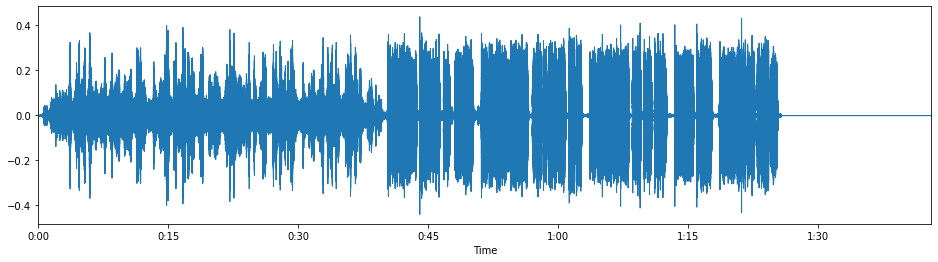

In [6]:
audio,sr=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Test Audio/main.mp3')
plt.figure(figsize=(16,4)) #create figure something like frame to plot graph
librosa.display.waveplot(audio, sr) #to plot frequency
mfcc = librosa.feature.mfcc(audio, sr) #chg to mfcc
print(mfcc.shape)
ipd.Audio(data=audio, rate=sr)

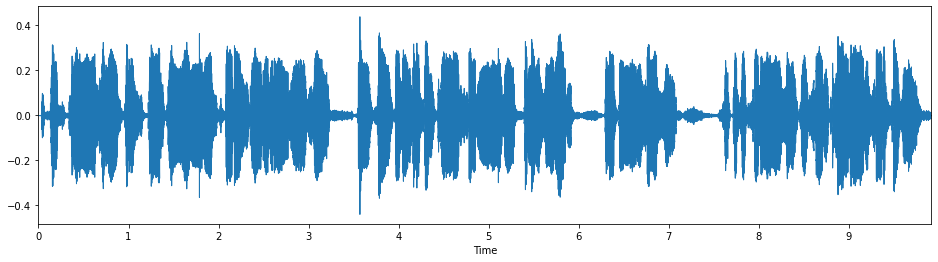

In [7]:
test,sr_test=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Test Audio/full sentence.m4a')
plt.figure(figsize=(16,4))
librosa.display.waveplot(test, sr_test)
ipd.Audio(data=test, rate=sr_test)


In [8]:
model_1_penangguhan, sr_model_1_penangguhan=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Model 1/penangguhan.mp3')
model_1_potongan_gaji, sr_model_1_potongan_gaji=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Model 1/potongangaji.mp3')
model_1_kecurian_bungkusan, sr_model_1_kecurian_bungkusan=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Model 1/kecurianbungkusan.mp3')

model_2_penangguhan, sr_model_2_penangguhan=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Model 2/penangguhan.mp3')
model_2_potongan_gaji, sr_model_2_potongan_gaji=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Model 2/kecurianbungkusan.mp3')
model_2_kecurian_bungkusan, sr_model_2_kecurian_bungkusan=librosa.load('/content/drive/MyDrive/Project Assignment for Github/Audio for DTW/Model 2/kecurianbungkusan.mp3')

mfcc_test = librosa.feature.mfcc(test, sr_test)
mfcc_test=pre_mfcc(mfcc_test)

model_1_mfcc_penangguhan=librosa.feature.mfcc(model_1_penangguhan,sr_model_1_penangguhan)
model_1_mfcc_potongan_gaji=librosa.feature.mfcc(model_1_potongan_gaji,sr_model_1_potongan_gaji)
model_1_mfcc_kecurian_bungkusan=librosa.feature.mfcc(model_1_kecurian_bungkusan,sr_model_1_kecurian_bungkusan)

model_2_mfcc_penangguhan=librosa.feature.mfcc(model_2_penangguhan,sr_model_2_penangguhan)
model_2_mfcc_potongan_gaji=librosa.feature.mfcc(model_2_potongan_gaji,sr_model_2_potongan_gaji)
model_2_mfcc_kecurian_bungkusan=librosa.feature.mfcc(model_2_kecurian_bungkusan,sr_model_2_kecurian_bungkusan)

model_1_mfcc_penangguhan=pre_mfcc(model_1_mfcc_penangguhan)
model_1_mfcc_potongan_gaji=pre_mfcc(model_1_mfcc_potongan_gaji)
model_1_mfcc_kecurian_bungkusan=pre_mfcc(model_1_mfcc_kecurian_bungkusan)

model_2_mfcc_penangguhan=pre_mfcc(model_2_mfcc_penangguhan)
model_2_mfcc_potongan_gaji=pre_mfcc(model_2_mfcc_potongan_gaji)
model_2_mfcc_kecurian_bungkusan=pre_mfcc(model_2_mfcc_kecurian_bungkusan)

In [9]:
def find_word(mfccs, mfcc_test): #window take from test then compare with our audio then find shortest distance[distance low, similarity high]

  # Getting the window size by averaging all the mfcc
  window_size = 0
  for i in range(len(mfccs)):
    window_size += mfccs[i].shape[1]
  window_size /= len(mfccs)
  window_size = np.ceil(window_size).astype(int)
  
  # Selecting the max window size
  # max_size = 0
  # for i in range(len(mfccs)):
  #   if mfccs[i].shape[1] > max_size:
  #     max_size = mfccs[i].shape[1]
  # window_size = max_size

  # Total distance of time after removing the windows size
  # i.e. total movements of windows
  distances = mfcc_test.shape[1] - window_size

  # Empty vector to store the distances of the mfccs
  dists = np.zeros(distances)

  # Iterate through each windows
  for i in tqdm(range(distances)):

    # Finding the end for each window
    # end = min(mfcc_test.shape[1], i + window_size)

    # Sample out the mfcc from the test with the window size
    # mfcci = mfcc_test[:, i : end]
    mfcci = mfcc_test[:, i: i + window_size]

    total_dist = 0
    
    # Iterate to calculate average of distances
    for j in range(len(mfccs)):
      # temp += fastdtw(mfccs[j].T, mfcci.T, dist=lambda x, y : np.exp(np.linalg.norm(x - y, ord=1)))[0]
      # temp += fastdtw(mfccs[j].T, mfcci.T, dist=euclidean)[0]
      total_dist += dtw(mfccs[j].T, mfcci.T, dist=lambda x, y : np.exp(np.linalg.norm(x - y, ord=1)))[0]
      # total_dist += dtw(mfccs[j].T, mfcci.T, dist=euclidean)[0]
    total_dist /= len(mfccs)

    # Add to dists matrix for word recognition
    dists[i] = total_dist
  
  plt.figure(figsize=(16, 4))
  plt.plot(dists)
  plt.show()
  return dists, window_size

In [10]:
def sample_word(dists, y_test, ws):
  word_match_idx = dists.argmin() #find min distance
  # Taking the window of the matched word
  # From the index starting to match until the end of the window (which is the shape[1] of the mfcc)
  word_matching_window = np.array([word_match_idx, np.ceil(word_match_idx + ws)])
  print(word_matching_window)
  # how long to sample for each matching
  samples_per_mfcc = 512

  # Finding the boundaries for the sample (i.e the window)
  word_samp_bounds = 1 + (word_matching_window * samples_per_mfcc)

  # Get the word from the test data (original audio)
  word = y_test[int(word_samp_bounds[0]):int(word_samp_bounds[1])]

  return word

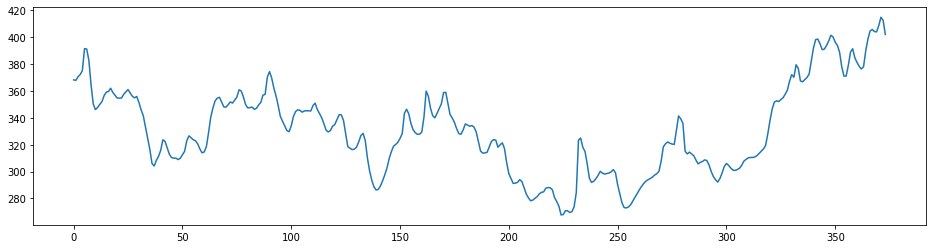

[224. 278.]


In [11]:
d_1, ws_1 = find_word([model_2_mfcc_penangguhan,model_1_mfcc_penangguhan], mfcc_test)
word_1 = sample_word(d_1, test, ws_1)
ipd.Audio(data=word_1, rate=sr_test)

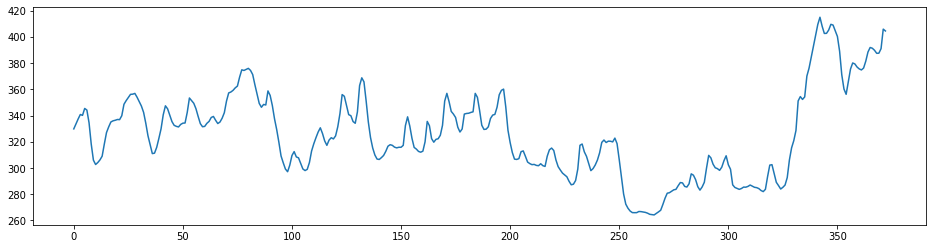

[266. 321.]


In [12]:
d_2, ws_2 = find_word([model_1_mfcc_potongan_gaji,model_2_mfcc_potongan_gaji], mfcc_test)
word_2 = sample_word(d_2, test, ws_2)
ipd.Audio(data=word_2, rate=sr_test)

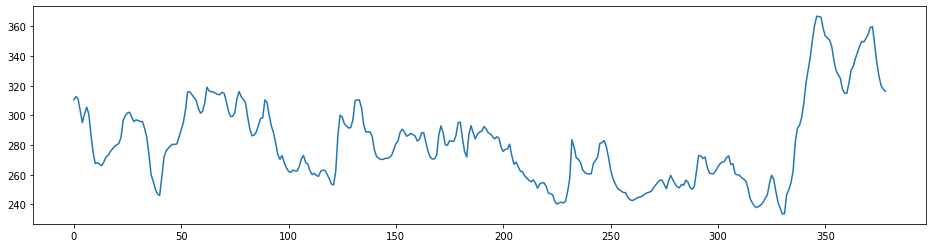

[330. 379.]


In [13]:
d_3, ws_3 = find_word([model_1_mfcc_kecurian_bungkusan,model_2_mfcc_kecurian_bungkusan], mfcc_test)
word_3 = sample_word(d_3, test, ws_3)
ipd.Audio(data=word_3, rate=sr_test)